In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('train.csv')
df.head(10)

,Patient_ID,Age,Marital_Status,Year of Operation,Positive_Axillary_Nodes,Tumor_Size,Radiation_Therapy,Chemotherapy,Hormone_Therapy,Survival_Status
0,1,77,Married,1962,5,3.0,No,Yes,No,1
1,2,36,Married,1964,2,1.9,Yes,No,No,1
2,3,47,Married,1960,5,2.0,No,No,No,0
3,4,54,Married,1965,0,1.4,No,No,No,0
4,5,35,Single,1968,5,4.1,Yes,Yes,Yes,1
5,6,65,Married,1961,4,4.2,Yes,No,No,1
6,7,71,Single,1963,0,4.8,Yes,No,No,1
7,8,31,Married,1961,4,2.8,Yes,No,No,1
8,9,38,Married,1967,9,2.7,Yes,No,No,0
9,10,75,Married,1963,46,4.8,No,No,No,1


In [2]:
# Vérifier les données manquantes dans chaque colonne
missing_data = df.isnull().sum()

# Afficher le résultat
print(missing_data)

Patient_ID                 0
Age                        0
Marital_Status             0
Year of Operation          0
Positive_Axillary_Nodes    0
Tumor_Size                 0
Radiation_Therapy          0
Chemotherapy               0
Hormone_Therapy            0
Survival_Status            0
dtype: int64


In [3]:
print(df.dtypes)


Patient_ID                   int64
Age                          int64
Marital_Status              object
Year of Operation            int64
Positive_Axillary_Nodes      int64
Tumor_Size                 float64
Radiation_Therapy           object
Chemotherapy                object
Hormone_Therapy             object
Survival_Status              int64
dtype: object


In [4]:
# Convertir les colonnes 'Yes'/'No' en valeurs booléennes True/False
df['Radiation_Therapy'] = df['Radiation_Therapy'].map({'Yes': True, 'No': False})
df['Chemotherapy'] = df['Chemotherapy'].map({'Yes': True, 'No': False})
df['Hormone_Therapy'] = df['Hormone_Therapy'].map({'Yes': True, 'No': False})

# Afficher les premières lignes pour vérifier la conversion
print(df[['Radiation_Therapy', 'Chemotherapy', 'Hormone_Therapy']].head())

   Radiation_Therapy  Chemotherapy  Hormone_Therapy
0              False          True            False
1               True         False            False
2              False         False            False
3              False         False            False
4               True          True             True


In [5]:
df['Radiation_Therapy'] = df['Radiation_Therapy'].astype(int)
df['Chemotherapy'] = df['Chemotherapy'].astype(int)
df['Hormone_Therapy'] = df['Hormone_Therapy'].astype(int)

print(df[['Radiation_Therapy', 'Chemotherapy', 'Hormone_Therapy']].head())


   Radiation_Therapy  Chemotherapy  Hormone_Therapy
0                  0             1                0
1                  1             0                0
2                  0             0                0
3                  0             0                0
4                  1             1                1


In [6]:
#pour le statut married on met 1 pour mariée on met 0 pour celibataire 
df['Marital_Status'] = df['Marital_Status'].map({'Married': True, 'Single': False})

In [7]:
df['Marital_Status'] = df['Marital_Status'].astype(int)
print(df[['Marital_Status']].head())

   Marital_Status
0               1
1               1
2               1
3               1
4               0


In [8]:
df.to_csv('train.csv', index=False)
df.head(10)

,Patient_ID,Age,Marital_Status,Year of Operation,Positive_Axillary_Nodes,Tumor_Size,Radiation_Therapy,Chemotherapy,Hormone_Therapy,Survival_Status
0,1,77,1,1962,5,3.0,0,1,0,1
1,2,36,1,1964,2,1.9,1,0,0,1
2,3,47,1,1960,5,2.0,0,0,0,0
3,4,54,1,1965,0,1.4,0,0,0,0
4,5,35,0,1968,5,4.1,1,1,1,1
5,6,65,1,1961,4,4.2,1,0,0,1
6,7,71,0,1963,0,4.8,1,0,0,1
7,8,31,1,1961,4,2.8,1,0,0,1
8,9,38,1,1967,9,2.7,1,0,0,0
9,10,75,1,1963,46,4.8,0,0,0,1


In [9]:
print(df.dtypes)

Patient_ID                   int64
Age                          int64
Marital_Status               int32
Year of Operation            int64
Positive_Axillary_Nodes      int64
Tumor_Size                 float64
Radiation_Therapy            int32
Chemotherapy                 int32
Hormone_Therapy              int32
Survival_Status              int64
dtype: object


In [10]:
#on verifie la correlation des données

# Supprimer la colonne 'Patient_ID' car elle ne represente en rien une donnée proppre au patient impactant sur la cible

df = df.drop(columns=['Patient_ID'])

# Afficher la matrice de corrélation
correlation_matrix = df.corr()

# Afficher la matrice de corrélation
print(correlation_matrix)

                              Age  Marital_Status  Year of Operation  \
Age                      1.000000       -0.047960           0.050435   
Marital_Status          -0.047960        1.000000          -0.026204   
Year of Operation        0.050435       -0.026204           1.000000   
Positive_Axillary_Nodes  0.019707       -0.003665           0.000063   
Tumor_Size               0.012105        0.002429          -0.049177   
Radiation_Therapy       -0.032951       -0.031681          -0.010890   
Chemotherapy             0.026073       -0.001863          -0.030622   
Hormone_Therapy          0.039076        0.004606           0.028578   
Survival_Status         -0.067626        0.017459          -0.042142   

                         Positive_Axillary_Nodes  Tumor_Size  \
Age                                     0.019707    0.012105   
Marital_Status                         -0.003665    0.002429   
Year of Operation                       0.000063   -0.049177   
Positive_Axillary_Nodes

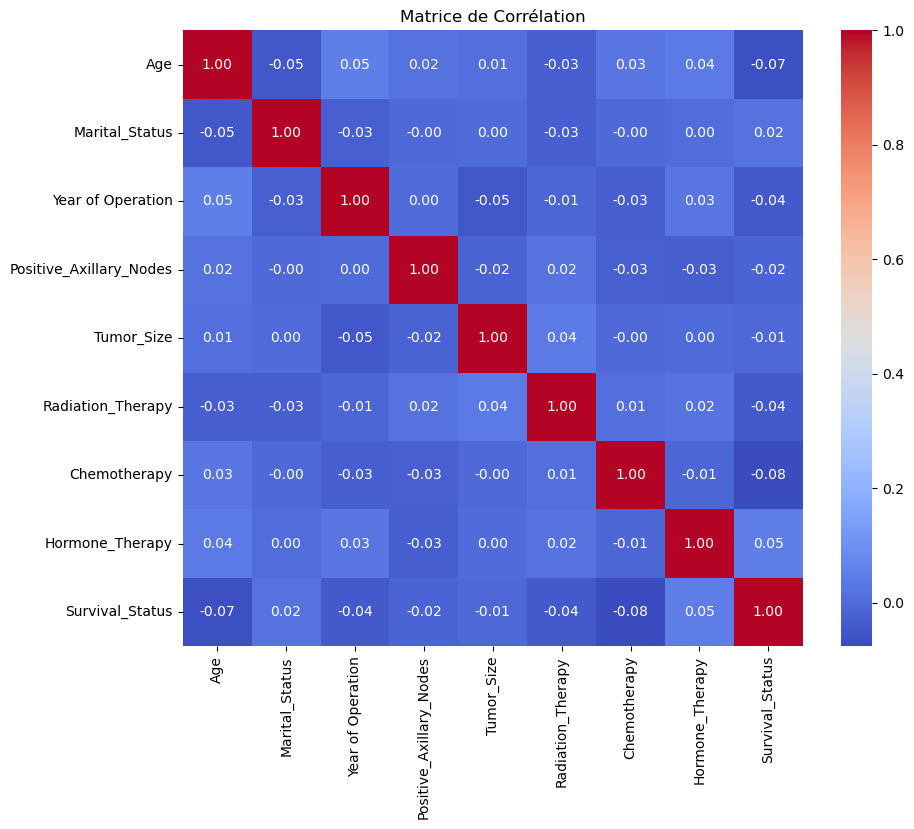

In [11]:
# Créer une carte thermique de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation')
plt.show()

In [13]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/e2/7b/8c1b410cd0604cee9a167a19f7e1746f5b92ae7d02ad574ab560b73c5a48/xgboost-2.1.1-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 393.8 kB/s eta 0:05:18
   ---------------------------------------- 0.1/124.9 MB 655.4 kB/s eta 0:03:11
   ---------------------------------------- 0.1/124.9 MB 654.9 kB/s eta 0:03:11
   ---------------------------------------- 0.2/124.9 MB 756.6 kB/s eta 0:02:45
   ---------------------------------------- 0.2/124.9 MB 731.4 kB/s eta 0:02:51
   ---------------------------------------- 0.2/124.9 MB 793.0 kB/s eta 0:02:38
   ---------------------------------------- 0.3/124.9 MB 768.0 kB/s eta 0:02:43
   -------------------

C:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:28:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:28:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:28:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\asus\anaconda3\Lib\site-packages\xgbo

Best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Accuracy: 0.51
F1 Score: 0.50
Feature importance (F-score):
Age: 131.0
Marital_Status: 10.0
Year of Operation: 97.0
Positive_Axillary_Nodes: 177.0
Tumor_Size: 167.0
Radiation_Therapy: 16.0
Chemotherapy: 30.0
Hormone_Therapy: 24.0


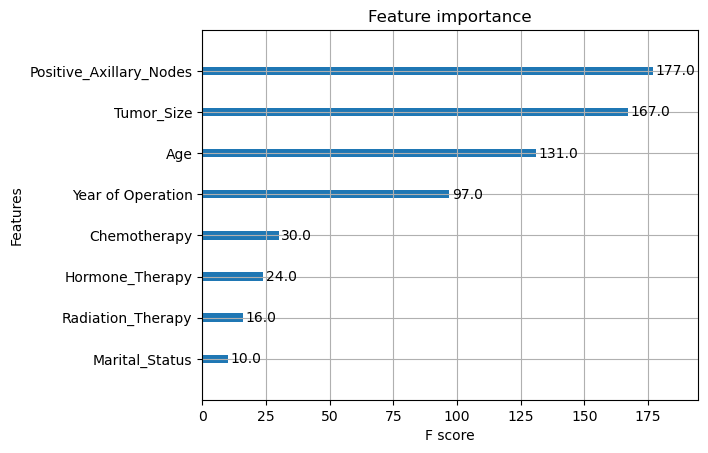

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
import xgboost as xgb

X = df.drop(columns=['Survival_Status'])  # Toutes les colonnes sauf 'Survival_Status'
y = df['Survival_Status']                 # La variable cible est 'Survival_Status'

# 5. Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Initialiser le modèle XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# 7. Définir la grille d'hyperparamètres à tester
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
}

# 8. Faire une recherche sur les meilleurs hyperparamètres via GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1', cv=5)
grid_search.fit(X_train, y_train)

# 9. Afficher les meilleurs hyperparamètres
print(f"Best params: {grid_search.best_params_}")

# 10. Entraîner le modèle avec les meilleurs hyperparamètres
best_xgb_model = grid_search.best_estimator_
best_xgb_model.fit(X_train, y_train)

# 11. Faire des prédictions sur l'ensemble de test
y_pred = best_xgb_model.predict(X_test)

# 12. Évaluer le modèle (accuracy et F1-score)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")

# 13. Importance des caractéristiques (F-score)
importance = best_xgb_model.get_booster().get_score(importance_type='weight')

# Affichage de l'importance des caractéristiques
print("Feature importance (F-score):")
for feature, score in importance.items():
    print(f"{feature}: {score}")

# 14. Optionnel : Visualiser l'importance des caractéristiques
xgb.plot_importance(best_xgb_model, importance_type='weight')
plt.show()

Accuracy: 0.54
F1 Score: 0.54
                   Feature  Importance
0                      Age    0.259118
4               Tumor_Size    0.251034
3  Positive_Axillary_Nodes    0.222953
2        Year of Operation    0.161839
1           Marital_Status    0.032544
6             Chemotherapy    0.028593
5        Radiation_Therapy    0.025886
7          Hormone_Therapy    0.018033


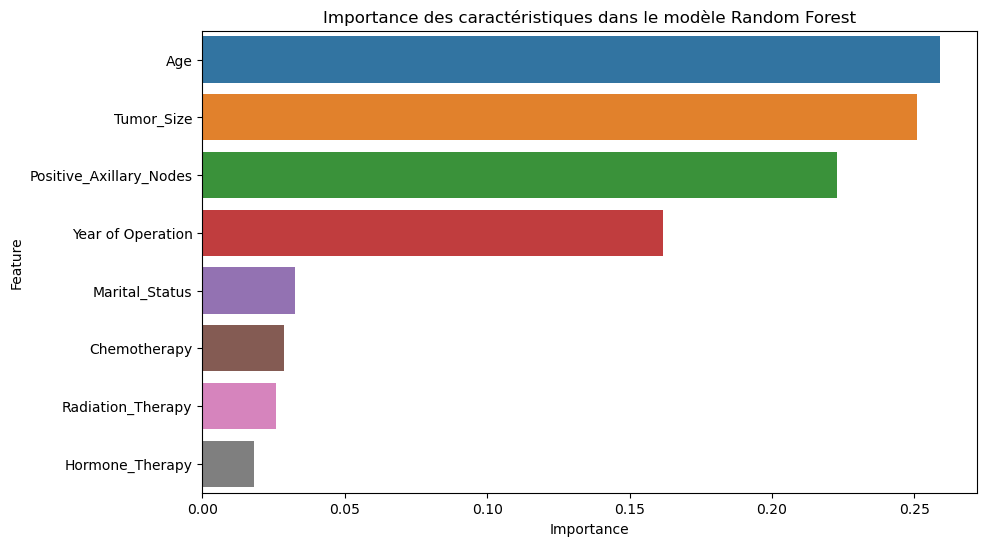

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# 3. Séparer les variables explicatives (X) et la variable cible (y)
X = df.drop(columns=['Survival_Status'])  # Toutes les colonnes sauf 'Survival_Status'
y = df['Survival_Status']                 # La variable cible est 'Survival_Status'

# 4. Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Initialiser le modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 6. Entraîner le modèle avec les données d'entraînement
rf_model.fit(X_train, y_train)

# 7. Faire des prédictions sur l'ensemble de test
y_pred = rf_model.predict(X_test)

# 8. Évaluer le modèle (précision et F1-score)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")

# 9. Importance des caractéristiques
importances = rf_model.feature_importances_

# Afficher les caractéristiques les plus importantes
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Afficher le tableau des importances
print(importance_df)

# 10. Optionnel : Visualiser l'importance des caractéristiques
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importance des caractéristiques dans le modèle Random Forest')
plt.show()

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],            # Nombre d'arbres
    'max_depth': [5, 10, 15],                   # Profondeur maximale des arbres
    'min_samples_split': [2, 5, 10],            # Minimum d'échantillons requis pour fractionner un nœud
    'min_samples_leaf': [1, 2, 4],              # Nombre minimum d'échantillons par feuille
    'bootstrap': [True, False]                  # Utiliser le bootstrap pour les échantillons
}

# Initialiser GridSearchCV avec le modèle RandomForest
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Meilleurs paramètres
best_params = grid_search.best_params_
print(f"Best params: {best_params}")

# Réentraîner le modèle avec les meilleurs paramètres
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Évaluer le modèle
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Improved Accuracy: {accuracy:.2f}")
print(f"Improved F1 Score: {f1:.2f}")


Best params: {'bootstrap': False, 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Improved Accuracy: 0.51
Improved F1 Score: 0.51


In [21]:
survival_counts = df['Survival_Status'].value_counts()

# Afficher les résultats
print("Nombre de survie (1):", survival_counts[1])
print("Nombre de décès (0):", survival_counts[0])

Nombre de survie (1): 740
Nombre de décès (0): 760


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# 1. Séparer les variables explicatives (X) et la variable cible (y)
X = df.drop(columns=['Survival_Status'])  # Toutes les colonnes sauf 'Survival_Status'
y = df['Survival_Status']                 # La variable cible est 'Survival_Status'

# 2. Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialiser le modèle de régression linéaire
linear_model = LinearRegression()

# 4. Entraîner le modèle avec les données d'entraînement
linear_model.fit(X_train, y_train)

# 5. Faire des prédictions sur l'ensemble de test
y_pred = linear_model.predict(X_test)

# 6. Comme c'est un problème de classification binaire, nous arrondissons les prédictions à 0 ou 1
y_pred_class = [1 if pred >= 0.5 else 0 for pred in y_pred]

# 7. Évaluer le modèle (précision et F1-score)
accuracy = accuracy_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")



Accuracy: 0.51
F1 Score: 0.49
